# Lecture 13: Searching

## 1. What is Searching?

In [1]:
15 in [3,5,2,4,1]

False

In [2]:
3 in [3,5,2,4,1]

True

## 2. The Sequential Search 

In [3]:
def sequential_search(a_list, item): 
    pos = 0
    found = False
    
    while pos < len(a_list) and not found: 
        if a_list[pos] == item:
            found = True 
        else:
            pos = pos+1 
            
    return found

In [4]:
test_list = [1, 4, 32, 10, 11, 19, 42, 13, 0, 12, 102]

In [5]:
print(sequential_search(test_list, 3))

False


In [6]:
print(sequential_search(test_list, 13))

True


## 3. The Ordered Sequential Search 

In [7]:
def ordered_sequential_search(a_list, item): 
    pos = 0
    found = False
    stop = False
    
    while pos < len(a_list) and not found and not stop: 
        if a_list[pos] == item:
            found = True 
        else:
            if a_list[pos] > item: 
                stop = True
            else:
                pos = pos+1
                
    return found

In [8]:
#test_list = [1, 2, 32, 8, 17, 19, 42, 13, 0]
test_list = [0, 1, 2, 8, 13, 17, 19, 32, 42]

In [9]:
print(ordered_sequential_search(test_list, 3))

False


In [10]:
print(ordered_sequential_search(test_list, 13))

True


## 4. The Binary Search 

In [11]:
def binary_search(a_list, item): 
    first = 0
    last = len(a_list) - 1
    found = False
    
    while first <= last and not found: 
        midpoint = (first + last) // 2 
        if a_list[midpoint] == item:
            found = True 
        else:
            if item < a_list[midpoint]: 
                last = midpoint - 1
            else:
                first = midpoint + 1
    return found

In [12]:
test_list = [0, 1, 2, 8, 13, 17, 19, 32, 42]

In [13]:
print(binary_search(test_list, 3))

False


In [14]:
print(binary_search(test_list, 13))

True


### 4.1 Implementation using Recursion 

In [15]:
def binary_search(a_list, item): 
    if len(a_list) == 0:
        return False 
    else:
        print('lo, hi = ', (a_list[0], a_list[-1]))
        midpoint = len(a_list) // 2

    if a_list[midpoint] == item: 
        return True
    else:
        if item < a_list[midpoint]:
            return binary_search(a_list[:midpoint], item) 
        else:
            return binary_search(a_list[midpoint + 1:],item)

In [16]:
test_list = [0, 1, 2, 8, 13, 17, 19, 32, 42]

In [17]:
print(binary_search(test_list, 3))

lo, hi =  (0, 42)
lo, hi =  (0, 8)
lo, hi =  (8, 8)
False


In [18]:
print(binary_search(test_list, 13))

lo, hi =  (0, 42)
True


In [19]:
binary_search(list(range(100)), 20)

lo, hi =  (0, 99)
lo, hi =  (0, 49)
lo, hi =  (0, 24)
lo, hi =  (13, 24)
lo, hi =  (20, 24)
lo, hi =  (20, 21)
lo, hi =  (20, 20)


True

In [20]:
binary_search(list(range(100)), -1)

lo, hi =  (0, 99)
lo, hi =  (0, 49)
lo, hi =  (0, 24)
lo, hi =  (0, 11)
lo, hi =  (0, 5)
lo, hi =  (0, 2)
lo, hi =  (0, 0)


False

In [21]:
binary_search(list(range(100)), 50.5)

lo, hi =  (0, 99)
lo, hi =  (51, 99)
lo, hi =  (51, 74)
lo, hi =  (51, 62)
lo, hi =  (51, 56)
lo, hi =  (51, 53)
lo, hi =  (51, 51)


False

## 5. Sequential Search Vs. Binary Search

In [22]:
import timeit

In [23]:
import matplotlib.pyplot as plt

In [24]:
def time_seq_search(size):
    return timeit.timeit('ordered_sequential_search(lst, random.randrange({}))'.format(size), # interpolate size into randrange
                         'import random ; from __main__ import ordered_sequential_search ;'
                         'lst = [x for x in range({})]'.format(size), # interpolate size into list range
                         number=50)

In [25]:
def time_bin_search(size):
    return timeit.timeit('binary_search(lst, random.randrange({}))'.format(size), # interpolate size into randrange
                         'import random ; from __main__ import binary_search ;'
                         'lst = [x for x in range({})]'.format(size), # interpolate size into list range
                         number=50)

In [26]:
seq_search_timings = [time_seq_search(n)
                      for n in range(10, 10000, 100)]

In [27]:
seq_search_timings

[0.00015918900001565817,
 0.00099048699999571,
 0.0016318499999954383,
 0.010446381000008387,
 0.003350581000006514,
 0.009873935000001666,
 0.010466250999996873,
 0.010874095999980682,
 0.016443275000000313,
 0.014100718999998207,
 0.021776387999977942,
 0.019472383999982412,
 0.01265545100000054,
 0.02726894399998514,
 0.022448035999985905,
 0.020760615999989795,
 0.012077537999999777,
 0.01258211199998982,
 0.014530927999999221,
 0.013405807999987474,
 0.01679163999997968,
 0.016895269999992024,
 0.016136716000005435,
 0.015216981999998325,
 0.009216026999979476,
 0.009393634000019802,
 0.01158523000000855,
 0.01216757200000984,
 0.010618604999990566,
 0.013309171000003062,
 0.011215683000017407,
 0.011844412000016291,
 0.012575234999985696,
 0.013744023999976207,
 0.012897261999995635,
 0.013988056000016513,
 0.013917266999982303,
 0.014610802000021295,
 0.01319527499998685,
 0.017873046999994813,
 0.017652072000004182,
 0.016886616999983062,
 0.021065364999998337,
 0.0235797389999

In [28]:
bin_search_timings = [time_bin_search(n)
                      for n in range(10, 10000, 100)]

Streaming output truncated to the last 5000 lines.
lo, hi =  (3133, 3415)
lo, hi =  (3275, 3415)
lo, hi =  (3275, 3344)
lo, hi =  (3311, 3344)
lo, hi =  (3311, 3327)
lo, hi =  (3311, 3318)
lo, hi =  (3316, 3318)
lo, hi =  (3318, 3318)
lo, hi =  (0, 9109)
lo, hi =  (4556, 9109)
lo, hi =  (6834, 9109)
lo, hi =  (6834, 7971)
lo, hi =  (6834, 7402)
lo, hi =  (6834, 7117)
lo, hi =  (6977, 7117)
lo, hi =  (7048, 7117)
lo, hi =  (7084, 7117)
lo, hi =  (7084, 7100)
lo, hi =  (7084, 7091)
lo, hi =  (7084, 7087)
lo, hi =  (7087, 7087)
lo, hi =  (0, 9109)
lo, hi =  (4556, 9109)
lo, hi =  (4556, 6832)
lo, hi =  (5695, 6832)
lo, hi =  (5695, 6263)
lo, hi =  (5695, 5978)
lo, hi =  (5838, 5978)
lo, hi =  (5909, 5978)
lo, hi =  (5945, 5978)
lo, hi =  (5963, 5978)
lo, hi =  (5972, 5978)
lo, hi =  (5976, 5978)
lo, hi =  (5978, 5978)
lo, hi =  (0, 9109)
lo, hi =  (4556, 9109)
lo, hi =  (4556, 6832)
lo, hi =  (4556, 5693)
lo, hi =  (5126, 5693)
lo, hi =  (5411, 5693)
lo, hi =  (5411, 5551)
lo, hi =  (5482

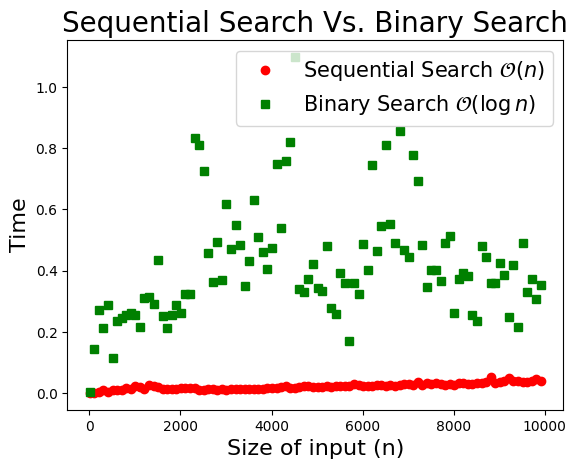

In [29]:
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Time', fontsize=16)
plt.title('Sequential Search Vs. Binary Search', fontsize = 20)
plt.plot(range(10, 10000, 100), seq_search_timings, 'ro')
plt.plot(range(10, 10000, 100), bin_search_timings, 'gs')
plt.legend(['Sequential Search $\mathcal{O}(n)$', 'Binary Search $\mathcal{O}(\log n)$'], 
             loc='best', fontsize=15);
plt.show()

- ## $\mathcal{O}(n)$ vs. $\mathcal{O}(\log n)$ 

## 6. Hashing

Hashing a string

In [30]:
ord('c')

99

In [31]:
ord('a')

97

In [32]:
ord('t')

116

In [33]:
def hash(a_string, table_size):
    sum = 0
    for pos in range(len(a_string)):
        sum = sum + pos*ord(a_string[pos])
        
    return sum % table_size

In [34]:
hash('dog', 20)

17

In [35]:
class HashTable:
    def __init__(self, size = 11):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def put(self, key, data):
        hash_value = self.hash_function(key,len(self.slots))
        
        if self.slots[hash_value] == None:      # 해당 hash_value 자리가 비어있으면
            self.slots[hash_value] = key 
            self.data[hash_value] = data
        else:                                   # 해당 hash_value 자리에 이미 존재하면
            if self.slots[hash_value] == key:   # 같은 Key이면
                self.data[hash_value] = data    # replace 
            else:                               # 같은 Key가 아니면 next slot 찾아야 함
                next_slot = self.rehash(hash_value, len(self.slots))    # rehash
                # 비어있지 않고 key랑 다른 경우 반복
                while self.slots[next_slot] != None and self.slots[next_slot] != key:   
                    next_slot = self.rehash(next_slot, len(self.slots))
                    
                if self.slots[next_slot] == None:
                    self.slots[next_slot] = key
                    self.data[next_slot] = data
                else:
                    self.data[next_slot] = data # replace
                        
    def hash_function(self, key, size):
        return key % size
    
    def rehash(self, old_hash, size):
        return (old_hash + 1) % size
    
    def get(self, key):
        start_slot = self.hash_function(key, len(self.slots))
        
        data = None
        stop = False
        found = False
        position = start_slot
        while self.slots[position] != None and not found and not stop: 
            if self.slots[position] == key:
                found = True
                data = self.data[position] 
            else:
                position=self.rehash(position, len(self.slots)) 
                if position == start_slot:
                    stop = True
        return data
    
    def __getitem__(self, key): 
        return self.get(key)
    
    def __setitem__(self, key, data): 
        self.put(key, data)

In [36]:
h=HashTable()

In [37]:
h[54]="cat"
h[26]="dog"
h[93]="lion"
h[17]="tiger"
h[77]="bird"
h[31]="cow"
h[44]="goat"
h[55]="pig"
h[20]="chicken"

In [38]:
h.slots

[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]

In [39]:
h.data

['bird',
 'goat',
 'pig',
 'chicken',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [40]:
h[20]

'chicken'

In [41]:
h[17]

'tiger'

In [42]:
h[20] = 'duck'

In [43]:
h[20]

'duck'

In [44]:
h.data

['bird',
 'goat',
 'pig',
 'duck',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [45]:
h.put(20, 'deer')

In [50]:
h.data

['bird',
 'goat',
 'pig',
 'deer',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [51]:
h.put(31, 'monkey')

In [52]:
h.data

['bird',
 'goat',
 'pig',
 'deer',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'monkey',
 'cat']

In [46]:
print(h[99])

None


## 7. Binary Search Vs. Hashing

In [47]:
def prep_ht(size):
    ht = HashTable(size)
    for x in range(size):
        ht[x] = x
    return ht

In [48]:
def time_bin_search(size):
    return timeit.timeit('binary_search(lst, random.randrange({}))'.format(size), # interpolate size into randrange
                         'import random ; from __main__ import binary_search ;'
                         'lst = [x for x in range({})]'.format(size), # interpolate size into list range
                         number=50)

def time_hash(size):
    return timeit.timeit('ht[random.randrange({})]'.format(size), 
                         'import random ; from __main__ import prep_ht ;'
                         'ht = prep_ht({})'.format(size),
                         number=50)

bin_search_timings = [time_bin_search(n)
                      for n in range(10, 10000, 100)]

hash_timings = [time_hash(n)
                for n in range(10, 10000, 100)]

Streaming output truncated to the last 5000 lines.
lo, hi =  (0, 9109)
lo, hi =  (0, 4554)
lo, hi =  (0, 2276)
lo, hi =  (0, 1137)
lo, hi =  (570, 1137)
lo, hi =  (570, 853)
lo, hi =  (713, 853)
lo, hi =  (713, 782)
lo, hi =  (713, 747)
lo, hi =  (731, 747)
lo, hi =  (740, 747)
lo, hi =  (745, 747)
lo, hi =  (747, 747)
lo, hi =  (0, 9109)
lo, hi =  (4556, 9109)
lo, hi =  (4556, 6832)
lo, hi =  (5695, 6832)
lo, hi =  (6265, 6832)
lo, hi =  (6265, 6548)
lo, hi =  (6408, 6548)
lo, hi =  (6408, 6477)
lo, hi =  (6408, 6442)
lo, hi =  (6426, 6442)
lo, hi =  (6435, 6442)
lo, hi =  (6435, 6438)
lo, hi =  (0, 9109)
lo, hi =  (0, 4554)
lo, hi =  (0, 2276)
lo, hi =  (0, 1137)
lo, hi =  (0, 568)
lo, hi =  (285, 568)
lo, hi =  (285, 426)
lo, hi =  (285, 355)
lo, hi =  (321, 355)
lo, hi =  (339, 355)
lo, hi =  (348, 355)
lo, hi =  (353, 355)
lo, hi =  (355, 355)
lo, hi =  (0, 9109)
lo, hi =  (4556, 9109)
lo, hi =  (4556, 6832)
lo, hi =  (5695, 6832)
lo, hi =  (6265, 6832)
lo, hi =  (6265, 6548)
lo, 

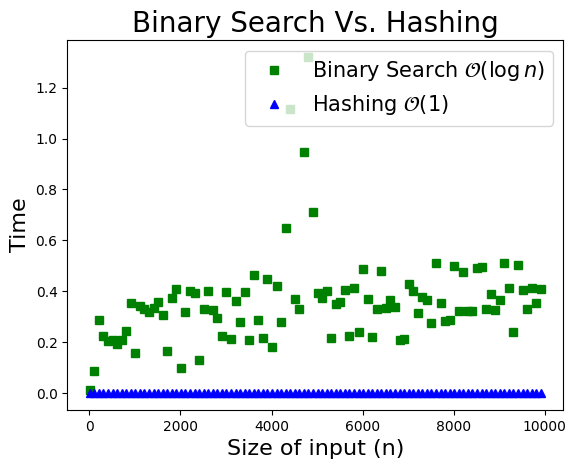

In [49]:
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Time', fontsize=16)
plt.title('Binary Search Vs. Hashing', fontsize = 20)
plt.plot(range(10, 10000, 100), bin_search_timings, 'gs')
plt.plot(range(10, 10000, 100), hash_timings, 'b^')
plt.legend(['Binary Search $\mathcal{O}(\log n)$', 'Hashing $\mathcal{O}(1)$'], 
            loc='best', fontsize=15);
# plt.legend(['Binary Search $\mathcal{O}(\log n)$', 'Hashing $\mathcal{O}(1)$'], 
#             loc='best', numpoints=1, fontsize=15);
plt.show()

## $\mathcal{O}(\log n)$ vs. $\mathcal{O}(1)$. 